In [2]:
!pip install -U -q PyDrive        #machine learning libraries
!pip install -q keras
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np
import pandas as pd
from skimage import io
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import GridSearchCV as gsc
import pickle



/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from keras.models import Sequential   #DeepLearning Libraries
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Image file loaded**

In [0]:
train_image = drive.CreateFile({'id' : '1D2clbBveWZ9H8JGL6a3SVBpHHp_YF9iB'})
train_image.GetContentFile('train.csv')

In [0]:
train_data = pd.read_csv('train.csv')

In [0]:
train_data_y = train_data.label.as_matrix()

In [0]:
train_data_x = np.matrix(train_data.values[:,1:])

In [9]:
train_data_y

array([1, 0, 1, ..., 7, 6, 9])

In [10]:
train_data_x


matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

**Splitting the dataset into training and testing sets.**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_data_x, train_data_y, test_size = 0.2, random_state = 92)  

**Displaying random image visualisation from pixels for the training data**

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


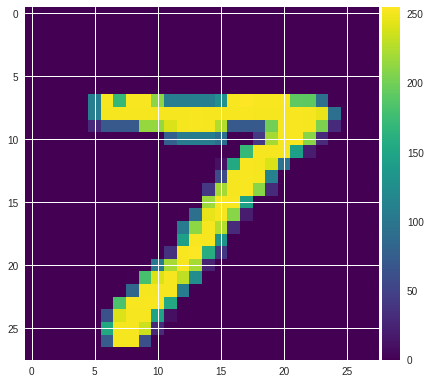

In [12]:
io.imshow(np.reshape(X_train[699],(28,28)))

In [13]:
y_train[699]

7

**Creating a logistic regression model for setting a baseline accuracy. Convolutional NeuralNets have to perform better than this atleast.**

In [0]:
parameters = {'C' : [0.01]}
clf=gsc(LR(),parameters,verbose = 5)

In [11]:
clf.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] C=0.01 ..........................................................
[CV] ................. C=0.01, score=0.8917350946090682, total= 6.5min
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.5min remaining:    0.0s


[CV] ................. C=0.01, score=0.9008928571428572, total= 6.9min
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 13.4min remaining:    0.0s


[CV] ................. C=0.01, score=0.8964808860307253, total= 7.0min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 20.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 20.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={'C': [0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

**Model Trained ... Dumping trained model to a pickle file**

In [0]:
pickle.dump(clf,open("LRModel.p","wb"))

**The Sigmoidal Model accuracy. Looks like i gotta make pretty awesome conv layers to achieve this min accuracy. **

In [14]:
clf.score(X_test,y_test)

0.9048809523809523

In [0]:
X_train_K = np.array(X_train).reshape(33600,28,28,1)   #playin around !
X_test_K = np.array(X_test).reshape(8400,28,28,1)

In [15]:
y_test.shape

(8400,)

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [19]:
y_train.shape

(33600, 10)

In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               240300    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
__________

In [21]:
model.fit(X_train_K, y_train, validation_data=(X_test_K, y_test), epochs=25, batch_size=300)

Train on 33600 samples, validate on 8400 samples
Epoch 1/25
33600/33600 [==============================] - 4s 111us/step - loss: 5.8397 - acc: 0.5979 - val_loss: 0.2770 - val_acc: 0.9320
Epoch 2/25
33600/33600 [==============================] - 2s 58us/step - loss: 0.2458 - acc: 0.9315 - val_loss: 0.1126 - val_acc: 0.9693
Epoch 3/25
33600/33600 [==============================] - 2s 58us/step - loss: 0.1313 - acc: 0.9612 - val_loss: 0.0881 - val_acc: 0.9736
Epoch 4/25
33600/33600 [==============================] - 2s 57us/step - loss: 0.0959 - acc: 0.9713 - val_loss: 0.0846 - val_acc: 0.9762
Epoch 5/25
33600/33600 [==============================] - 2s 56us/step - loss: 0.0802 - acc: 0.9756 - val_loss: 0.0756 - val_acc: 0.9798
Epoch 6/25
33600/33600 [==============================] - 2s 55us/step - loss: 0.0657 - acc: 0.9795 - val_loss: 0.0710 - val_acc: 0.9808
Epoch 7/25
 9900/33600 [=======>......................] - ETA: 1s - loss: 0.0461 - acc: 0.9854

33600/33600 [==============================] - 2s 56us/step - loss: 0.0556 - acc: 0.9826 - val_loss: 0.0682 - val_acc: 0.9821
Epoch 8/25
33600/33600 [==============================] - 2s 55us/step - loss: 0.0494 - acc: 0.9841 - val_loss: 0.0655 - val_acc: 0.9823
Epoch 9/25
33600/33600 [==============================] - 2s 55us/step - loss: 0.0385 - acc: 0.9872 - val_loss: 0.0650 - val_acc: 0.9835
Epoch 10/25
33600/33600 [==============================] - 2s 56us/step - loss: 0.0358 - acc: 0.9890 - val_loss: 0.0650 - val_acc: 0.9831
Epoch 11/25
33600/33600 [==============================] - 2s 56us/step - loss: 0.0320 - acc: 0.9893 - val_loss: 0.0638 - val_acc: 0.9846
Epoch 12/25
33600/33600 [==============================] - 2s 56us/step - loss: 0.0315 - acc: 0.9895 - val_loss: 0.0625 - val_acc: 0.9850
Epoch 13/25
29100/33600 [========================>.....] - ETA: 0s - loss: 0.0291 - acc: 0.9910

33600/33600 [==============================] - 2s 55us/step - loss: 0.0291 - acc: 0.9910 - val_loss: 0.0822 - val_acc: 0.9846
Epoch 14/25
33600/33600 [==============================] - 2s 55us/step - loss: 0.0266 - acc: 0.9914 - val_loss: 0.0693 - val_acc: 0.9852
Epoch 15/25
33600/33600 [==============================] - 2s 56us/step - loss: 0.0254 - acc: 0.9915 - val_loss: 0.0638 - val_acc: 0.9850
Epoch 16/25
33600/33600 [==============================] - 2s 55us/step - loss: 0.0196 - acc: 0.9938 - val_loss: 0.0707 - val_acc: 0.9835
Epoch 17/25
33600/33600 [==============================] - 2s 55us/step - loss: 0.0239 - acc: 0.9924 - val_loss: 0.0620 - val_acc: 0.9858
Epoch 18/25
33600/33600 [==============================] - 2s 55us/step - loss: 0.0234 - acc: 0.9924 - val_loss: 0.0612 - val_acc: 0.9848
Epoch 19/25
30300/33600 [==========================>...] - ETA: 0s - loss: 0.0168 - acc: 0.9938

33600/33600 [==============================] - 2s 55us/step - loss: 0.0176 - acc: 0.9936 - val_loss: 0.0626 - val_acc: 0.9867
Epoch 20/25
33600/33600 [==============================] - 2s 55us/step - loss: 0.0161 - acc: 0.9947 - val_loss: 0.0637 - val_acc: 0.9871
Epoch 21/25
33600/33600 [==============================] - 2s 55us/step - loss: 0.0178 - acc: 0.9940 - val_loss: 0.0636 - val_acc: 0.9879
Epoch 22/25
33600/33600 [==============================] - 2s 56us/step - loss: 0.0142 - acc: 0.9953 - val_loss: 0.0698 - val_acc: 0.9860
Epoch 23/25
33600/33600 [==============================] - 2s 55us/step - loss: 0.0173 - acc: 0.9939 - val_loss: 0.0692 - val_acc: 0.9855
Epoch 24/25
33600/33600 [==============================] - 2s 55us/step - loss: 0.0212 - acc: 0.9930 - val_loss: 0.0654 - val_acc: 0.9869
Epoch 25/25
32100/33600 [===========================>..] - ETA: 0s - loss: 0.0159 - acc: 0.9950

33600/33600 [==============================] - 2s 55us/step - loss: 0.0160 - acc: 0.9949 - val_loss: 0.0653 - val_acc: 0.9862


In [23]:
scores = model.evaluate(X_test_K,y_test,verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.62%


**Voila!!! 98.62 % accuracy with a ConvNeuralNet with an AlexNet architecture**